<a href="https://colab.research.google.com/github/sunwoo1210/Deep-Learning-from-Scratch/blob/main/chapter_3_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3. 신경망

### 3.1 퍼셉트론에서 신경망으로 

---


3.1.1 신경망의 예
- **입력층**
- **출력층**
- **은닉층** (사람의 눈에는 보이지 X)

<br>

3.1.3 활성화 함수의 등장
- **활성화 함수**: 입력 신호의 총합을 출력 신호로 변환하는 함수
- 입력 신호의 총합이 활성화를 일으키는지를 정하는 역할
- 노드(=뉴런)

### 3.2 활성화 함수


---

#### 3.2.1 시그모이드 함수
- 신경망에서는 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환
- 변환된 신호를 다음 뉴런에 전달

#### 3.2.2 계단 함수 구현하기

In [ ]:
def step_function(x):
  if x > 0:
    return 1
  else:
    return 0

In [ ]:
# 넘파이 배열도 지원하도록 수정

def step_function(x):
  y = x > 0
  return y.astype(np.int)

In [ ]:
# 넘파이 배열을 준비하고 그 넘파이 배열에 부등호 연산을 수행

import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [ ]:
y = x > 0
y

array([False,  True,  True])

In [ ]:
y = y.astype(np.int)  #astype: 넘파이 배열의 자료형 변환
y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


array([0, 1, 1])

#### 3.2.3 계단 함수의 그래프

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


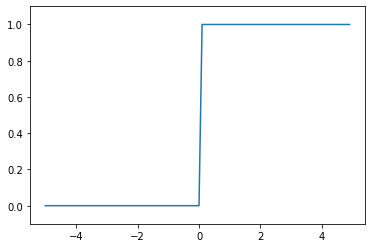

In [ ]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
  return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)   # y축의 범위 지정
plt.show()

#### 3.2.4 시그모이드 함수 구현하기

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [ ]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [ ]:
# 브로드캐스트 기능: 넘파이 배열과 스칼라값의 연산을 넘파이 배열의 원소 각각과 스칼라값의 연산으로 바꿔 수행

t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [ ]:
1.0 / t

array([1.        , 0.5       , 0.33333333])

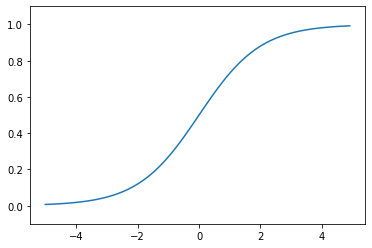

In [ ]:
# 시그모이드 함수 그래프

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)   # y축 범위 지정
plt.show()

#### 3.2.5 시그모이드 함수와 계단 함수 비교
- 매끄러움의 차이
> 시그모이드 함수: 부드러운 곡선, 입력에 따라 출력이 연속적으로 변화 <br>
계단 함수: 0을 경계로 출력이 갑자기 바뀌어버림

- 공통점 <br>
>큰 관점에서 같은 모양을 하고 있음 <br>
입력이 작을 때의 출력은 0에 가깝고(혹은 0이고), <br>
입력이 커지면 출력이 1에 가까워지는 (혹은 1이 되는) 구조 <br>
입력이 아무리 작거나 커도 출력은 0에서 1 사이

#### 3.2.6 비선형 함수
- 계단 함수 & 시그모이드 함수의 공통점: **비선형 함수**
- 신경망에서는 활성화 함수로 비선형 함수를 사용 <br>
선형 함수를 이용하면 신경망의 층을 깊게 하는 의미 X

#### 3.2.7 ReLU 함수
- 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력

In [ ]:
def relu(x):
  return np.maximum(0, x)

### 3.3 다차원 배열의 연산

---



#### 3.3.1 다차원 배열

In [ ]:
# 1차원 배열

import numpy as np
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [ ]:
np.ndim(A)

1

In [ ]:
A.shape

(4,)

In [ ]:
A.shape[0]

4

In [ ]:
# 2차원 배열 
# 행: 배열의 가로 방향
# 열: 배열의 세로 방향

B = np.array([[1,2], [3,4], [5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [ ]:
np.ndim(B)

2

In [ ]:
B.shape

(3, 2)

#### 3.3.2 행렬의 곱
- 왼쪽 행렬의 행과 오른쪽 행렬의 열을 원소별로 곱하고 그 값을 더해서 계산

In [ ]:
# 2X2 행렬의 곱

A = np.array([[1,2], [3,4]])
A.shape

(2, 2)

In [ ]:
B = np.array([[5,6], [7,8]])
B.shape

(2, 2)

In [ ]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [ ]:
# 2X3 행렬 A와 3X2 행렬 B의 곱

A = np.array([[1,2,3], [4,5,6]])
A.shape

(2, 3)

In [ ]:
B = np.array([[1,2],[3,4], [5,6]])
B.shape

(3, 2)

In [ ]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [ ]:
# 3X2의 행렬 A와 2인 B를 곱해 C의 원소 수를 3개 출력하기

A = np.array([[1,2], [3,4], [5,6]])
A.shape

(3, 2)

In [ ]:
B = np.array([7,8])
B.shape

(2,)

In [ ]:
np.dot(A, B)

array([23, 53, 83])

#### 3.3.3 신경망에서의 행렬 곱

In [ ]:
X = np.array([1, 2])
X.shape

(2,)

In [ ]:
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [ ]:
W.shape

(2, 3)

In [ ]:
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


### 3.4 3층 신경망 구현하기

---



#### 3.4.2 각 층의 신호 전달 구현하기

In [ ]:
# 넘파이의 다차원 배열을 사용해서 A(1) = XW(1) + B(1) 구현하기

X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)   # (2, 3)
print(X.shape)  # (2,)
print(B1.shape)   # (3,)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


In [ ]:
Z1 = sigmoid(A1)

print(A1)   # [0.3, 0.7, 1.1]
print(Z1)   # [0.57444252, 0.66818777, 0.75026011]

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [ ]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)   # (3,)
print(W2.shape)   # (3, 2)
print(B2.shape)   # (2,)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [ ]:
def identity_function(x):
  return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)   # Y = A3

#### 3.4.3 구현 정리

In [45]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):    # 신경망의 순방향 구현
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)    # [0.31682708 0.69627909]

[0.31682708 0.69627909]


### 3.5 출력층 설계하기

---


- 신경망은 분류와 회귀 모두에 이용 가능
- 일반적으로 회귀에 항등 함수, 분류에 소프트맥스 함수를 사용

#### 3.5.1 항등 함수와 소프트맥스 함수 구현하기
- **항등 함수**: 입력을 그대로 출력 (입력 = 출력)
- **소프트맥스 함수**: 분자는 입력 신호 ak의 지수 함수, 분모는 모든 입력 신호의 지수 함수의 합

In [46]:
# 소프트맥스 함수 구현

a = np.array([0.3, 2.9, 4.0])

In [47]:
exp_a = np.exp(a)   # 지수 함수
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [48]:
sum_exp_a = np.sum(exp_a)   # 지수 함수의 합
print(sum_exp_a)

74.1221542101633


In [49]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [50]:
# 소프트맥스 함수 정의

def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

#### 3.5.2 소프트맥스 함수 구현 시 주의점
- 컴퓨터로 계산할 때의 결함: 오버플로 문제
- 큰 값끼리 나눗셈을 하면 결과 수치가 불안정해짐
- 소프트맥스의 지수 함수를 계산할 대 어떤 정수를 더해도 (빼도) 결과는 바뀌지 않음

In [52]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))   # 소프트맥스 함수의 계산 (제대로 계산되지 않음)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

In [53]:
c = np.max(a)   # c = 1010 (최댓값)
a - c

array([  0, -10, -20])

In [54]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [57]:
# 소프트맥스 함수 구현

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)   # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

#### 3.5.3 소프트맥스 함수의 특징
- 소프트맥스 함수의 출력은 0에서 1.0 사이
- 출력 총합이 1이 된다는 점이 특징
- 소프트맥스 함수의 출력을 '확률'로 해석 가능
- 신경망으로 분류할 때는 출력층의 소프트맥스 함수를 생략해도 됨

In [58]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [59]:
np.sum(y)

1.0

### 3.6 손글씨 숫자 인식

---

- **순전파**(forward propagation): 이미 학습된 매개변수를 사용하여 학습 과정은 생략하고 추론 과정만 구현

#### 3.6.1 MNIST 데이터셋
- 손글씨 숫자 이미지 집합
- 0~9까지의 숫자 이미지로 구성

In [61]:
# coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np


url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = os.path.dirname(os.path.abspath(__file__))
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name
    
    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    urllib.request.urlretrieve(url_base + file_name, file_path)
    print("Done")
    
def download_mnist():
    for v in key_file.values():
       _download(v)
        
def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")
    
    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")    
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")
    
    return data
    
def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])    
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])
    
    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T
    

def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNIST 데이터셋 읽기
    
    Parameters
    ----------
    normalize : 이미지의 픽셀 값을 0.0~1.0 사이의 값으로 정규화할지 정한다.
    one_hot_label : 
        one_hot_label이 True면、레이블을 원-핫(one-hot) 배열로 돌려준다.
        one-hot 배열은 예를 들어 [0,0,1,0,0,0,0,0,0,0]처럼 한 원소만 1인 배열이다.
    flatten : 입력 이미지를 1차원 배열로 만들지를 정한다. 
    
    Returns
    -------
    (훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블)
    """
    if not os.path.exists(save_file):
        init_mnist()
        
    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)
    
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])    
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 


if __name__ == '__main__':
    init_mnist()

NameError: ignored